In [9]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [158]:
 class GradientBoosting:
    def __init__(self, n_estimators, learning_rate, min_samples_split,
                 max_depth, regression):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.regression = regression
        
        self.trees = []
        for _ in range(n_estimators):
            tree = DecisionTreeRegressor(min_samples_split=self.min_samples_split, 
                                         max_depth=self.max_depth)
            self.trees.append(tree)
            
    def get_residuals(self, Y, Y_pred):
        return Y - Y_pred
            
    def fit(self, X, Y):
        self.starting_mean = np.mean(Y)
        Y_pred = np.full(len(Y), self.starting_mean).reshape(-1,1)
        for i in range(self.n_estimators):
            residuals = self.get_residuals(Y, Y_pred)
            self.trees[i].fit(X, residuals)
            new_pred = self.trees[i].predict(X)
            Y_pred -= self.learning_rate * new_pred.reshape(-1,1)
            
    def predict(self, X):
        Y_pred = self.starting_mean
        for tree in self.trees:
            new_pred = tree.predict(X)
            Y_pred += self.learning_rate * new_pred
        return Y_pred
    
class GradientBoostingRegressor(GradientBoosting):
    def __init__(self, n_estimators=100, learning_rate=0.5, 
                 min_samples_split=2, max_depth=4):
        super().__init__(n_estimators=n_estimators, 
                         learning_rate=learning_rate,
                         min_samples_split=min_samples_split, 
                         max_depth=max_depth,
                         regression=True)

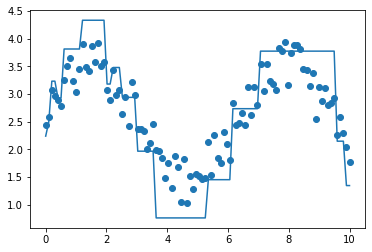

In [159]:
X = np.linspace(0, 10, 100)
Y = 2 + np.sin(X) + np.random.rand(100)
plt.scatter(X, Y)

model = GradientBoostingRegressor(learning_rate=0.01)
model.fit(X.reshape(-1,1), Y.reshape(-1, 1))
Y_pred = model.predict(X.reshape(-1,1))
plt.plot(X, Y_pred)